# Bank Loan Status Prediction

# 1. 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

import time

# 2. 데이터 불러오기

In [2]:
train = pd.read_csv('credit_train.csv')
test = pd.read_csv('credit_test.csv')

In [3]:
train.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0


In [4]:
test.head(3)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [7]:
train.drop(['Loan ID', 'Customer ID', 'Months since last delinquent'], axis = 1, inplace = True)
test.drop(['Loan ID', 'Customer ID', 'Months since last delinquent'], axis = 1, inplace = True)

학습에 필요없는 'Loan ID'와 'Customer ID' 칼럼을 삭제하고 결측값이 너무 많은 'Months since last delinquent' 칼럼 또한 삭제한다.

In [8]:
train.dropna(subset = ['Loan Status'], inplace = True)

In [9]:
df = pd.concat([train.drop('Loan Status', axis = 1), test], axis = 0)
df.index = range(len(df))

In [10]:
df

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


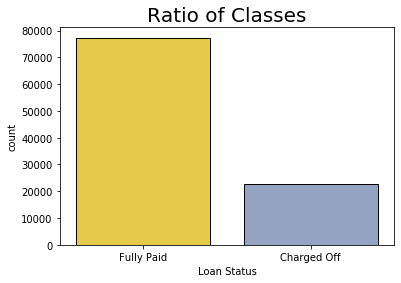

In [11]:
sns.countplot(train['Loan Status'], edgecolor = (0,0,0), palette = 'Set2_r')
plt.xticks(rotation = 0)
plt.title('Ratio of Classes', size = 20)
plt.show()

class의 비율이 대략 8대2가 되는 것을 알 수 있다.

In [12]:
train['Loan Status'] = train['Loan Status'].map({'Fully Paid' : 1, 'Charged Off' : 0})

class를 숫자형으로 변환해 준다.

# 3. Data 전처리

## Feature Engineering

In [13]:
df.isnull().sum()

Current Loan Amount            353
Term                           353
Credit Score                 21488
Annual Income                21488
Years in current job          5002
Home Ownership                 353
Purpose                        353
Monthly Debt                   353
Years of Credit History        353
Number of Open Accounts        353
Number of Credit Problems      353
Current Credit Balance         353
Maximum Open Credit            355
Bankruptcies                   579
Tax Liens                      364
dtype: int64

In [14]:
cat_columns = df.columns[df.dtypes != 'float64']

In [15]:
cat_columns

Index(['Term', 'Years in current job', 'Home Ownership', 'Purpose'], dtype='object')

In [16]:
for c in range(len(cat_columns)):
    df[cat_columns[c]] = df[cat_columns[c]].fillna(df[cat_columns[c]].mode()[0])

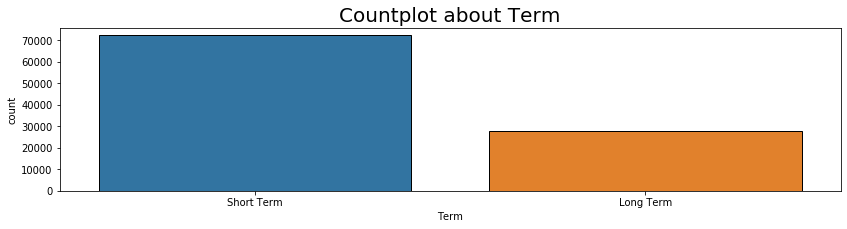

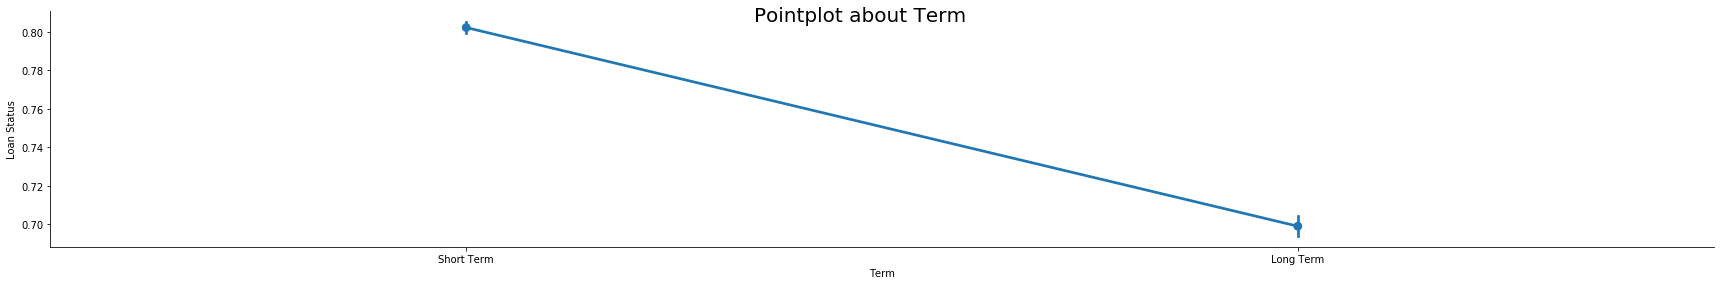

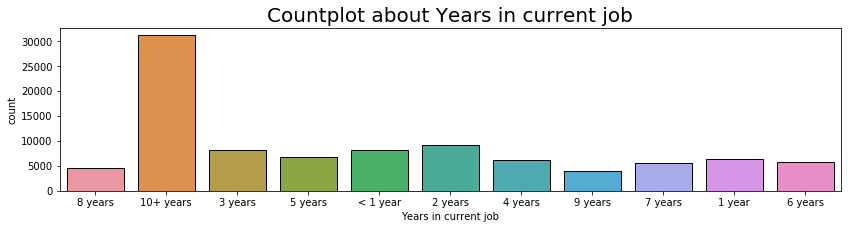

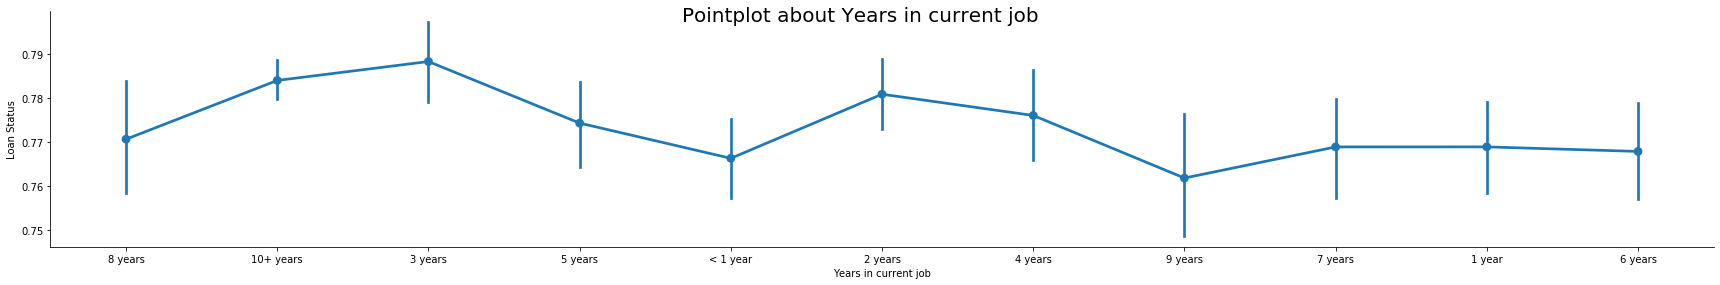

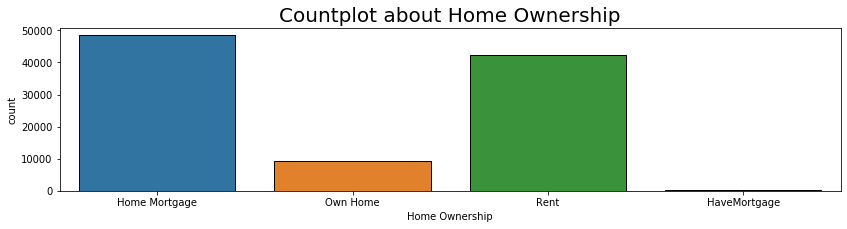

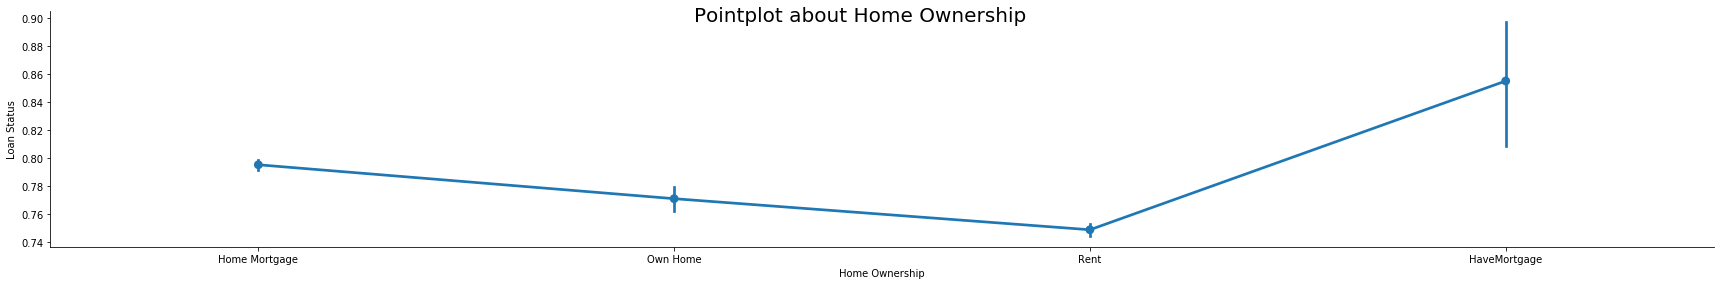

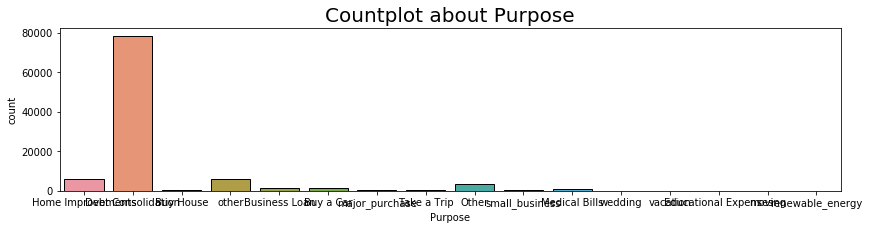

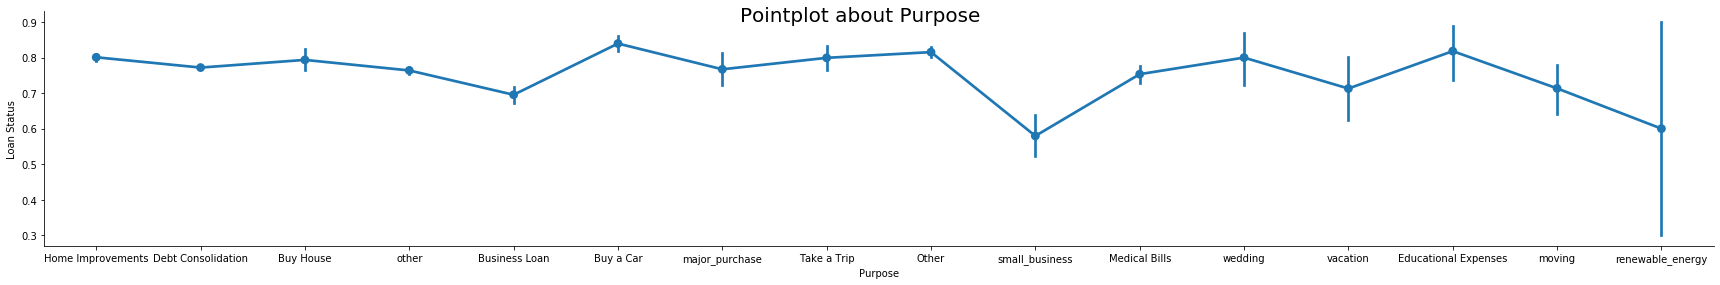

In [17]:
for c in range(len(cat_columns)):
    plt.figure(figsize = (14,3))
    plt.title('Countplot about {}'.format(cat_columns[c]), size = 20)
    sns.countplot(train[cat_columns[c]], edgecolor = (0,0,0))
    
    ax = sns.catplot(x = str(cat_columns[c]), y = 'Loan Status', data = train, kind = 'point', height = 4, aspect = 6)
    ax.fig.suptitle('Pointplot about {}'.format(cat_columns[c]), size = 20)
    plt.show()
    print(' '*100)

In [18]:
numeric_columns = df.columns[df.dtypes == 'float64']

In [19]:
df[numeric_columns] = df[numeric_columns].fillna(0)

In [20]:
before_skew = []
after_skew = []
for c in range(len(numeric_columns)):
        
        before_skew.append(abs(np.round(skew(df[numeric_columns[c]]), 4)))
        after_skew.append(abs(np.round(skew(np.log1p(df[numeric_columns[c]])),4)))

In [21]:
skew_df = pd.DataFrame({'before' : before_skew, 'after' : after_skew}, index = numeric_columns)

In [22]:
skew_df['compare'] = skew_df.before - skew_df.after

In [23]:
skew_df

,before,after,compare
Current Loan Amount,2.4238,0.9085,1.5153
Credit Score,4.0775,1.4020,2.6755
Annual Income,33.1859,1.5148,31.6711
Monthly Debt,2.1998,4.3639,-2.1641
Years of Credit History,1.0098,1.2649,-0.2551
Number of Open Accounts,1.1457,0.6753,0.4704
Number of Credit Problems,4.9205,2.5739,2.3466
Current Credit Balance,14.2137,4.5807,9.6330
Maximum Open Credit,138.3660,5.7465,132.6195
Bankruptcies,3.5068,2.6990,0.8078


In [24]:
skew_cols = skew_df.loc[skew_df.compare > 0].index

In [25]:
df[skew_cols] = np.log1p(df[skew_cols])

In [26]:
scale_cols = skew_df.loc[skew_df.compare < 0].index

### 스케일링 실행

In [27]:
sc = MinMaxScaler()

In [28]:
sc_df = df[scale_cols]

In [29]:
scaled_df = pd.DataFrame(sc.fit_transform(sc_df))

In [30]:
df = pd.concat([df.drop(scale_cols, axis = 1), scaled_df], axis = 1)

In [31]:
df = pd.get_dummies(df, columns = cat_columns)

In [32]:
df.head()

,Current Loan Amount,Credit Score,Annual Income,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,0,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,13.006757,6.565265,13.970370,1.945910,0.693147,12.337938,12.940235,0.693147,0.0,0.011965,...,0,0,0,0,0,0,0,0,0,0
1,12.477355,0.000000,0.000000,3.583519,0.000000,12.345735,13.653915,0.000000,0.0,0.076394,...,0,0,0,0,0,0,0,0,0,0
2,18.420681,6.609349,14.618361,2.944439,0.693147,12.604839,13.527950,0.000000,0.0,0.066998,...,0,0,0,0,0,0,0,0,0,0
3,12.759000,6.582025,13.601017,2.302585,0.000000,12.454221,12.866074,0.000000,0.0,0.020057,...,0,0,0,0,0,0,0,0,0,0
4,12.079494,0.000000,0.000000,2.772589,0.000000,12.442965,12.964949,0.000000,0.0,0.047356,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.shape

(110353, 44)

# 4. Modeling

In [34]:
from sklearn.model_selection import *
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier,BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [35]:
from bayes_opt import BayesianOptimization
from functools import partial  

In [36]:
X = df.copy().iloc[:len(train), :]
X.columns = [x.replace('_<', '') if type(x) == str else x for x in list(X.columns)]
y = train['Loan Status']

In [37]:
kf = StratifiedKFold(n_splits = 7, random_state = 123, shuffle=True, )

In [38]:
acc_list = []
roc_auc_list = []
models = []

In [171]:
def cv_fit(model):
    start = time.time()
    models.append(model.__class__.__name__)
    cv_model = cross_validate(model, X, y, scoring = ['accuracy','roc_auc'], cv = kf, )
    acc = np.round(cv_model['test_accuracy'].mean(), 3)
    roc_auc = np.round(cv_model['test_roc_auc'].mean(), 3)
    acc_list.append(acc) 
    roc_auc_list.append(roc_auc)
    print(model.__class__.__name__,'의 acc는 {}, roc_auc는 {}'.format(acc, roc_auc))
    print('코드 수행 시간은 {}초'.format(np.round(time.time() - start), 3))

In [172]:
cv_fit(LogisticRegression())

LogisticRegression 의 acc는 0.817, roc_auc는 0.734
코드 수행 시간은 7.0초


In [173]:
cv_fit(AdaBoostClassifier(random_state = 123))

AdaBoostClassifier 의 acc는 0.819, roc_auc는 0.757
코드 수행 시간은 51.0초


In [174]:
cv_fit(GradientBoostingClassifier(random_state = 123))

GradientBoostingClassifier 의 acc는 0.819, roc_auc는 0.761
코드 수행 시간은 185.0초


In [175]:
cv_fit(LinearDiscriminantAnalysis())

LinearDiscriminantAnalysis 의 acc는 0.819, roc_auc는 0.734
코드 수행 시간은 6.0초


In [176]:
cv_fit(SGDClassifier(random_state = 123, loss = 'modified_huber'))

SGDClassifier 의 acc는 0.694, roc_auc는 0.729
코드 수행 시간은 48.0초


In [177]:
cv_fit(ExtraTreeClassifier(random_state = 123))

ExtraTreeClassifier 의 acc는 0.757, roc_auc는 0.638
코드 수행 시간은 2.0초


In [178]:
cv_fit(GaussianNB())

GaussianNB 의 acc는 0.695, roc_auc는 0.643
코드 수행 시간은 1.0초


In [179]:
cv_fit(DecisionTreeClassifier(random_state = 123))

DecisionTreeClassifier 의 acc는 0.759, roc_auc는 0.647
코드 수행 시간은 12.0초


In [180]:
cv_fit(RandomForestClassifier(random_state = 123))

RandomForestClassifier 의 acc는 0.82, roc_auc는 0.811
코드 수행 시간은 161.0초


In [181]:
cv_fit(KNeighborsClassifier())

KNeighborsClassifier 의 acc는 0.793, roc_auc는 0.687
코드 수행 시간은 309.0초


In [182]:
cv_fit(XGBClassifier(random_state = 123))

XGBClassifier 의 acc는 0.82, roc_auc는 0.764
코드 수행 시간은 140.0초


In [183]:
cv_fit(LGBMClassifier(random_state = 123))

LGBMClassifier 의 acc는 0.82, roc_auc는 0.767
코드 수행 시간은 11.0초


In [184]:
cv_fit(MLPClassifier(random_state = 123))

MLPClassifier 의 acc는 0.818, roc_auc는 0.748
코드 수행 시간은 1321.0초


In [200]:
df = pd.DataFrame({'model' : models, 'accuracy_score' : acc_list, 'roc_auc_score' : roc_auc_list})

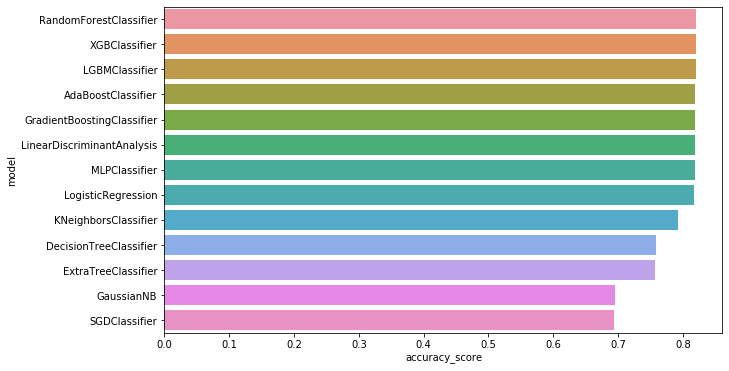

In [215]:
plt.figure(figsize = (10,6))
sns.barplot(y = df.model, x = df.accuracy_score, order = df.sort_values(by = 'accuracy_score', ascending = False).model.values)
plt.show()

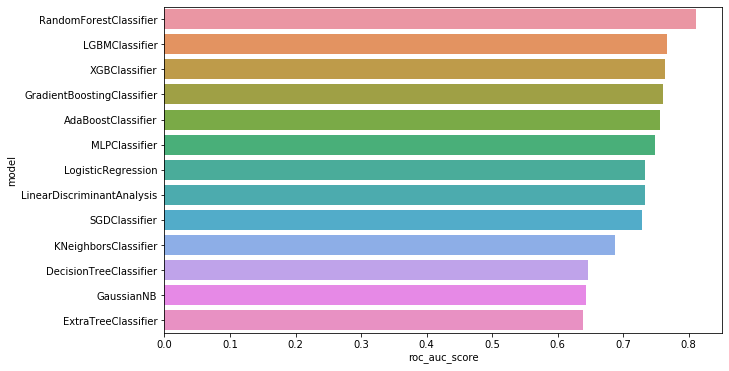

In [210]:
plt.figure(figsize = (10,6))
sns.barplot(y = df.model, x = df.roc_auc_score, order = df.sort_values(by = 'roc_auc_score', ascending = False).model.values)
plt.show()

### 최종모델은 
* LGBMClassifier
* XGBClassifier
* RandomForestClassifier

In [38]:
def grid_model(model, get_score):
        gr_cv_model = GridSearchCV(model, cv = kf, param_grid = params, n_jobs = -1,  scoring = get_score)
        gr_cv_model.fit(X, y)
        score = gr_cv_model.best_score_
        cv_params = gr_cv_model.best_params_
        cv_est = gr_cv_model.best_estimator_
        print(score)
        print(cv_params)
        return cv_est

In [41]:
params = {'n_estimators' : [50, 100,200, 300,400,500],'learning_rate' : [0.001,0.005, 0.01, 0.05, 0.1, 0.2],
              'max_depth' : [3,4,5,6,7],'num_leaves' : [20,30,40,100]}

In [261]:
grid_lgbm = grid_model(LGBMClassifier(random_state = 777), 'accuracy')

0.8205599871201736
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 100}


In [42]:
grid_lgbm = grid_model(LGBMClassifier(random_state = 777), 'roc_auc')

0.7695337422964815
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'num_leaves': 100}


In [39]:
params = {'eta' : [0.01, 0.05,0.1, 0.15,0.2], 'max_depth' : [3,4,5,6,7], 'subsample' : [0.6, 0.7, 0.8, 0.9],
            'gamma': [0.01,0.1,0.001],'n_estimators':[5,10,20,100]}

In [41]:
grid_xgb = grid_model(XGBClassifier(random_state = 777), 'accuracy')

0.8203399929201275
{'eta': 0.1, 'gamma': 0.001, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}


In [40]:
grid_xgb = grid_model(XGBClassifier(random_state = 777), 'roc_auc')

0.7684812819844115
{'eta': 0.1, 'gamma': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}


In [45]:
params = {'n_estimators' : [20,30,50,100,150], 'criterion' : ['gini', 'entropy'],
        'max_depth' : [3,4,5,6,7]}

In [46]:
grid_rf = grid_model(RandomForestClassifier(random_state = 777), 'accuracy')

0.8191399952189966
{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 30}


In [47]:
grid_rf = grid_model(RandomForestClassifier(random_state = 777), 'roc_auc')

0.7445897068961228
{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50}


# 5. Test 세트 예측

### 최종 모델은 LGBMClassifier(accuracy), RandomForestClassifier(roc_auc_score)

#### LGBMClassifier

In [42]:
te = df.copy()[len(train) : ]

In [45]:
final_lgbm = LGBMClassifier(random_state = 777, **{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 100})

In [46]:
final_lgbm.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=300, n_jobs=-1, num_leaves=100, objective=None,
               random_state=777, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [47]:
acc_pred = final_lgbm.predict(te)

In [56]:
pd.DataFrame({'LoanStatus' : acc_pred}).LoanStatus.value_counts()

1    9798
0     555
Name: LoanStatus, dtype: int64

#### RandomForestClassifier

In [57]:
final_rf = RandomForestClassifier(random_state = 777)

In [58]:
final_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

In [61]:
roc_pred = final_rf.predict_proba(te)[:, 1]

In [63]:
pd.DataFrame({'pred' : roc_pred})

,pred
0,0.87
1,0.83
2,0.91
3,0.75
4,0.83
...,...
10348,0.55
10349,0.55
10350,0.55
10351,0.55


# Finished!